# This file serves to demonstrate how to use a function defined in this package.
Specifically, it serves to show how to use the calc_calc_hysteresis_area_1D function to compute hysteresis area.

Note that the ref_axis needs to be strictly monotonically changing to the global extremum and strictly monotonically changing afterwards. Otherwise, unwanted behaviour can occur.

In this example i use a circular hysteresis pattern, with a sin/cos function as the ref_axis and data_series. 

Thus the (hysteresis) area spanned should correspond to the area of a circle with radius 1, i.e. pi*r^2 = pi.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Importing the functions from the package
import sys
sys.path.insert(0,'/home/ekoehn/software/')
import hysteresis # import the package
from hysteresis import hyst_areas as ha # import the submodule hyst_areas

#import importlib
#importlib.reload(ha)

<module 'hysteresis.hyst_areas' from '/home/ekoehn/software/hysteresis/hyst_areas.py'>

In [22]:
length = 180
ref_axis = np.sin(np.linspace(-np.pi/2,3/2*np.pi,length)) # strictly monotonically increasing and then strictly monotonically decreasing reference axis over a 2pi cycle
data_series = np.cos(np.linspace(-np.pi/2,3/2*np.pi,length))#+0.05*np.cos(20*np.linspace(-np.pi/2,3/2*np.pi,length)) # 
#data_series[int(length/2):]=1

Text(0.5, 1.0, 'Data series vs. ref. axis (blue to yellow)')

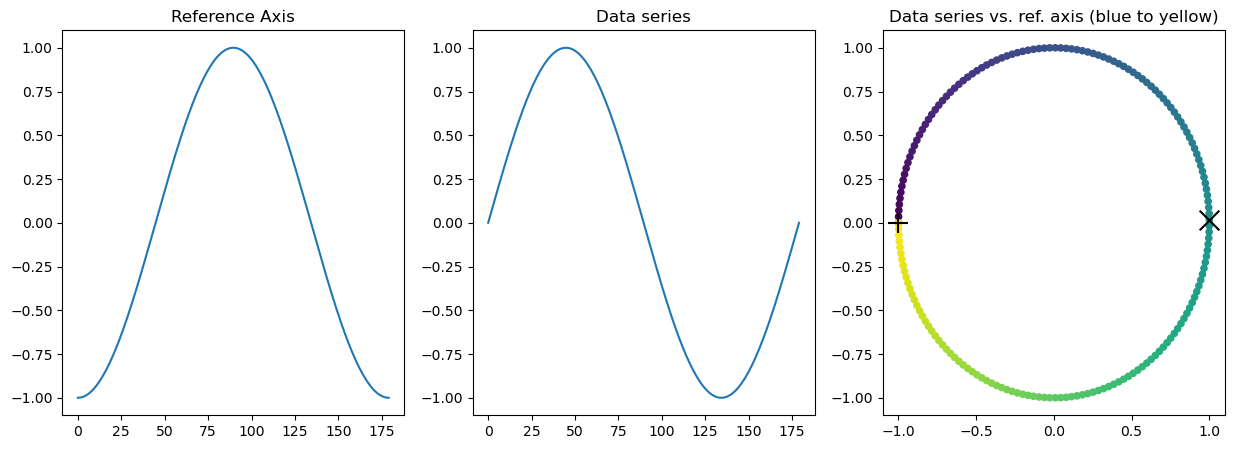

In [27]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(ref_axis)
ax[0].set_title('Reference Axis')
ax[1].plot(data_series)
ax[1].set_title('Data series')
ax[2].scatter(ref_axis,data_series,20,np.arange(length))
#find argmax of ref_axis
argmini = np.argmin(ref_axis)
argmaxi = np.argmax(ref_axis)
ax[2].scatter(ref_axis[argmini],data_series[argmini],200,'k',marker='+')
ax[2].scatter(ref_axis[argmaxi],data_series[argmaxi],200,'k',marker='x')
ax[2].set_title('Data series vs. ref. axis (blue to yellow)')

## Do the calculation of the hysteresis area and return the interpolated vectors etc.

In [24]:
normalizer = 'min_max_diff_full_cycle'
result = ha.calc_hysteresis_area_1D(ref_axis, data_series, nsteps=1000, normalizer=normalizer,return_interpolated_vectors = True)
hysteresis_area, signed_hysteresis_area, normalized_hysteresis_area, normalizer_value,interpolated_rampup, interpolated_rampdown, ramping_vector = result

Hysteresis Area: 3.1408456293497946
Signed hysteresis Area (Mean of rampdown minus mean of rampup): -1.568973211649146
Normalized hysteresis Area (normalized with min_max_diff_full_cycle): 1.5704897364208348
Normalizer value (min_max_diff_full_cycle): 1.9999147759525127


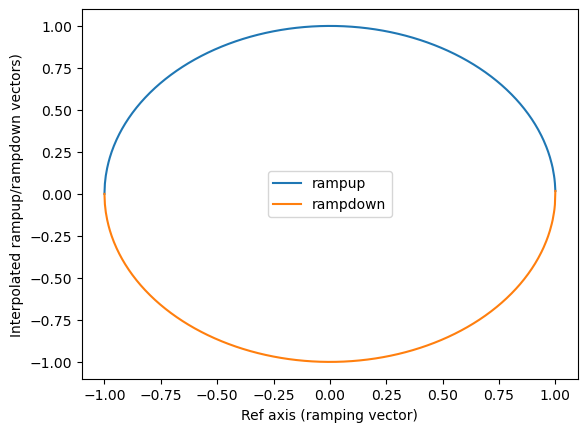

In [25]:
fig, ax = plt.subplots()
ax.plot(ramping_vector,interpolated_rampup,label='rampup')
ax.plot(ramping_vector,interpolated_rampdown,label='rampdown')
ax.legend()
ax.set_xlabel('Ref axis (ramping vector)')
ax.set_ylabel('Interpolated rampup/rampdown vectors)')
print(f'Hysteresis Area: {hysteresis_area}')
print(f'Signed hysteresis Area (Mean of rampdown minus mean of rampup): {signed_hysteresis_area}')
print(f'Normalized hysteresis Area (normalized with {normalizer}): {normalized_hysteresis_area}')
print(f'Normalizer value ({normalizer}): {normalizer_value}')
